In [161]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import textstat
import emoji
import re

In [162]:
# Define the base path to your CSV files

base_path = '/Users/sandervanduin/Desktop/HVA weekly /Digitial Marketing Strategy/DMSteam9'
#base_path = '/Users/owenalberts/Desktop/Master Digital Driven Business/Digital marketing strategy/DMSteam9'
#base_path = '/Users/alvarocairo/Desktop/DMS/VScode DMS'

# Explicitly load each CSV file into its own DataFrame
df1 = pd.read_csv(os.path.join(base_path, 'Themeparcs I.csv'), on_bad_lines='skip', delimiter=';')
df2 = pd.read_csv(os.path.join(base_path, 'Themeparcs II.csv'), on_bad_lines='skip', delimiter=';')
df3 = pd.read_csv(os.path.join(base_path, 'Themeparcs III.csv'), on_bad_lines='skip', delimiter=';')
df4 = pd.read_csv(os.path.join(base_path, 'Themeparcs IV.csv'), on_bad_lines='skip', delimiter=';')

# Example operation: print the first few rows of the DataFrame
merged_df = pd.concat([df1, df2, df3, df4], ignore_index=True)
print("First few rows of Merged Themeparcs :")
merged_df.head(5)


First few rows of Merged Themeparcs :


,Date,Profile,Message,Number of Reactions,Number of Shares,Number of Comments (primary),Number of Shares.1,Comments per post,Comments on posts by fans,Post interaction rate,Engagement,Number of Likes,Link-posts,Picture Posts,Video-posts,Profile-ID,Post-ID,Link
0,12/31/23 9:40 PM,Wild Adventures Theme Park,🎟️🚨 Today's the FINAL day to use your 2023 Sea...,16.0,NaN,2.0,2.0,2.0,2.0,"1,09E+12","1090000000000,00",13.0,NaN,1.0,NaN,84679583132,84679583132_770120045161180,https://www.facebook.com/617429960430190/posts...
1,12/31/23 8:01 PM,Fun Spot America,See you next year! 😉 Don’t miss...,38.0,NaN,1.0,2.0,1.0,1.0,"4,17E+11","417000000000,00",33.0,NaN,NaN,NaN,"1,84E+11",184020466977_767286052104076,https://www.facebook.com/653224623510220/posts...
2,12/31/23 7:30 PM,Fun Spot America,Don't miss our HUGE firework display ! 🥳\n\n#f...,23.0,NaN,2.0,3.0,2.0,2.0,"2,85E+11","285000000000,00",21.0,NaN,NaN,1.0,"1,84E+11",184020466977_767267948772553,https://www.facebook.com/653224623510220/posts...
3,12/31/23 7:00 PM,Disneyland Paris,Fijne jaarwisseling! 🥂🎉\nEn tot volgend jaar 😉,646.0,NaN,52.0,12.0,56.0,56.0,"1,36E+11","136000000000,00",478.0,NaN,1.0,NaN,"6,52E+14",652389081615295_775974521237956,https://www.facebook.com/724434559725286/posts...
4,12/31/23 7:00 PM,Silverwood Theme Park,It's the last day of our New Year's Sale! Save...,17.0,NaN,2.0,0.0,2.0,2.0,"4,96E+11","496000000000,00",16.0,NaN,NaN,1.0,"7,63E+14",762701550509617_678920137770716,https://www.facebook.com/562559642740100/posts...


In [163]:
print(merged_df.shape)

(15443, 18)


In [164]:
# Replace `merged_df` with the name of your actual DataFrame
merged_df.to_csv('merged_df.csv', index=False)

In [165]:
# Sum the relevant columns to create a total score for each observation
columns_to_sum = [
    'Number of Reactions', 'Number of Shares', 'Number of Comments (primary)', 
    'Number of Shares.1', 'Comments per post', 'Comments on posts by fans', 
    'Post interaction rate', 'Number of Likes'
]

# Convert columns to numeric, coercing errors to NaN
for column in columns_to_sum:
    merged_df[column] = pd.to_numeric(merged_df[column], errors='coerce')

# Fill NaN values with 0 for calculation
merged_df = merged_df.fillna(0)

# Calculate the total score
merged_df['total_score'] = merged_df[columns_to_sum].sum(axis=1).round(2).astype(int)

merged_df.head(5)

,Date,Profile,Message,Number of Reactions,Number of Shares,Number of Comments (primary),Number of Shares.1,Comments per post,Comments on posts by fans,Post interaction rate,Engagement,Number of Likes,Link-posts,Picture Posts,Video-posts,Profile-ID,Post-ID,Link,total_score
0,12/31/23 9:40 PM,Wild Adventures Theme Park,🎟️🚨 Today's the FINAL day to use your 2023 Sea...,16.0,0.0,2.0,2.0,2.0,2.0,0.0,"1090000000000,00",13.0,0.0,1.0,0.0,84679583132,84679583132_770120045161180,https://www.facebook.com/617429960430190/posts...,37
1,12/31/23 8:01 PM,Fun Spot America,See you next year! 😉 Don’t miss...,38.0,0.0,1.0,2.0,1.0,1.0,0.0,"417000000000,00",33.0,0.0,0.0,0.0,"1,84E+11",184020466977_767286052104076,https://www.facebook.com/653224623510220/posts...,76
2,12/31/23 7:30 PM,Fun Spot America,Don't miss our HUGE firework display ! 🥳\n\n#f...,23.0,0.0,2.0,3.0,2.0,2.0,0.0,"285000000000,00",21.0,0.0,0.0,1.0,"1,84E+11",184020466977_767267948772553,https://www.facebook.com/653224623510220/posts...,53
3,12/31/23 7:00 PM,Disneyland Paris,Fijne jaarwisseling! 🥂🎉\nEn tot volgend jaar 😉,646.0,0.0,52.0,12.0,56.0,56.0,0.0,"136000000000,00",478.0,0.0,1.0,0.0,"6,52E+14",652389081615295_775974521237956,https://www.facebook.com/724434559725286/posts...,1300
4,12/31/23 7:00 PM,Silverwood Theme Park,It's the last day of our New Year's Sale! Save...,17.0,0.0,2.0,0.0,2.0,2.0,0.0,"496000000000,00",16.0,0.0,0.0,1.0,"7,63E+14",762701550509617_678920137770716,https://www.facebook.com/562559642740100/posts...,39


In [166]:
# Fill NaN values with 0 for calculation
merged_df['Number of Shares'] = merged_df['Number of Shares'].fillna(0)
# merged_df['Number of Shares.1'] = merged_df['Number of Shares.1'].fillna(0)

# Calculate total shares by summing both shares columns
merged_df['total_shares'] = merged_df['Number of Shares'] + merged_df['Number of Shares.1']

# Now group by 'Profile' and sum the 'Total Shares', and then sort the sums in ascending order
shares_per_profile = merged_df.groupby('Profile')['total_shares'].sum().sort_values(ascending=False)

shares_per_profile.head(5)

Profile
Walt Disney Animation Studios    227392.0
Walt Disney Studios (US)         118026.0
Universal Orlando Resort (US)     76962.0
Walt Disney World                 59715.0
Disneyland                        51015.0
Name: total_shares, dtype: float64

In [167]:
# Function to calculate the average excluding zeros, unless all values are zero
def calculate_unweighted_average(row):
    values = [row['Number of Reactions'], row['total_shares'], row['Number of Comments (primary)'], row['Number of Likes']]
    # Remove zeros but only if not all values are zeros
    filtered_values = [value for value in values if value != 0] or values
    return np.mean(filtered_values)

# Apply the function to each row in the DataFrame
merged_df['Unweighted_Engagement_Score'] = merged_df.apply(calculate_unweighted_average, axis=1)

# Display the first few rows to verify the changes
merged_df[['Date', 'Profile', 'Message', 'Number of Reactions', 'total_shares', 'Number of Comments (primary)', 'Number of Likes', 'Unweighted_Engagement_Score']].head()

,Date,Profile,Message,Number of Reactions,total_shares,Number of Comments (primary),Number of Likes,Unweighted_Engagement_Score
0,12/31/23 9:40 PM,Wild Adventures Theme Park,🎟️🚨 Today's the FINAL day to use your 2023 Sea...,16.0,2.0,2.0,13.0,8.250000
1,12/31/23 8:01 PM,Fun Spot America,See you next year! 😉 Don’t miss...,38.0,2.0,1.0,33.0,18.500000
2,12/31/23 7:30 PM,Fun Spot America,Don't miss our HUGE firework display ! 🥳\n\n#f...,23.0,3.0,2.0,21.0,12.250000
3,12/31/23 7:00 PM,Disneyland Paris,Fijne jaarwisseling! 🥂🎉\nEn tot volgend jaar 😉,646.0,12.0,52.0,478.0,297.000000
4,12/31/23 7:00 PM,Silverwood Theme Park,It's the last day of our New Year's Sale! Save...,17.0,0.0,2.0,16.0,11.666667


In [168]:
# sample_df = merged_df.sample(n=100, random_state=42)
# sample_df.to_csv('sample.csv', index=False)

In [169]:
#  the distribution of the text length
#  the distribution of the hastags
#  the distribution of the readability of the message


# Count the number of characters in each message
merged_df['text_length'] = merged_df['Message'].apply(len)


# Count the number of hashtags in each message
merged_df['hashtag_count'] = merged_df['Message'].apply(lambda x: len([word for word in x.split() if word.startswith('#')]))


# What does the readability score mean?
# The Flesch Reading Ease formula will output a number from 0 to 100 - a higher score indicates easier readability.
merged_df['readability_score'] = merged_df['Message'].apply(textstat.flesch_reading_ease).round(2).astype(int)


# Function to count the number of emojis in each post
def count_emojis(text):
    # Using the emoji library to count all emoji characters in the text
    return emoji.emoji_count(text)
# Apply the function to count emojis
merged_df['emoji_count'] = merged_df['Message'].apply(count_emojis)


# Print the first few rows of the DataFrame
merged_df[['Profile', 'Message', 'text_length', 'hashtag_count', 'readability_score', 'emoji_count', 'total_score']].head(10)


,Profile,Message,text_length,hashtag_count,readability_score,emoji_count,total_score
0,Wild Adventures Theme Park,🎟️🚨 Today's the FINAL day to use your 2023 Sea...,337,0,74,7,37
1,Fun Spot America,See you next year! 😉 Don’t miss...,141,4,87,3,76
2,Fun Spot America,Don't miss our HUGE firework display ! 🥳\n\n#f...,128,8,38,1,53
3,Disneyland Paris,Fijne jaarwisseling! 🥂🎉\nEn tot volgend jaar 😉,45,0,48,3,1300
4,Silverwood Theme Park,It's the last day of our New Year's Sale! Save...,227,0,83,0,39
5,Belmont Park,The sun sets over 2023…🌅\n\nWishing everyone a...,342,0,90,4,105
6,SeaWorld Orlando,Animal rescue and rehabilitation has always be...,602,0,56,0,1366
7,Canada's Wonderland,As this roller coaster of a year comes to a th...,212,0,86,4,239
8,SeaWorld San Diego,"As we close out 2023, we want to take a moment...",528,0,68,0,454
9,Lake Compounce,Who’s ready to party tonight? 🪩\n\nJoin Kyle t...,339,0,68,7,120


# Estimating the Number of Followers from Engagement Data

To estimate the number of followers on social media from engagement data, we perform several steps of data manipulation and apply a mathematical formula. Here's how we accomplish this task using Python and pandas:

## Steps of Calculation

### Step 1: Understanding the Formula

We start with the provided formula for engagement rate:

\[ \text{Engagement Rate} = \left( \frac{\text{Number of Reactions} + \text{Number of Shares} + \text{Number of Comments}}{\text{Number of Followers}} \right) \times 100 \]

To solve for the number of followers, we rearrange the formula:

\[ \text{Number of Followers} = \frac{\text{Number of Reactions} + \text{Number of Shares} + \text{Number of Comments}}{\text{Engagement Rate} / 100} \]

### Step 2: Cleaning the 'Engagement' Data

The 'Engagement' data was originally in a format that was not directly usable for calculations (e.g., `'1,09E+12'`). This represents a number in scientific notation but with a comma used as a decimal separator. To make this data usable, we needed to:

- Replace the comma with a dot to adhere to the standard decimal notation.
- Convert the string to a floating-point number.
- Scale down the number since it was represented in an inflated scientific notation format.

### Step 3: Applying the Adjusted Formula

With the 'Engagement' data cleaned and scaled down, we applied the rearranged formula to estimate the number of followers. 

### Step 4: Formatting the Output

After calculation, the number of followers was initially displayed in scientific notation by pandas (e.g., `5.220588e+06`). To display this as a regular integer with thousands separators (e.g., `5.220.588`), we set pandas' display options to avoid scientific notation and to use a period as a thousands separator.



In [170]:
import pandas as pd
import numpy as np  # Import numpy for isinf

# Assuming merged_df is already defined and contains the necessary columns
# Adjust the 'Engagement' values by dividing by 10^10 to correct the scale
merged_df['Engagement'] = merged_df['Engagement'].str.replace(',', '.').astype(float) / (10**10)

# Calculate the 'Estimated Followers' and multiply by 1000
merged_df['Estimated Followers'] = ((merged_df['Number of Reactions'] + merged_df['Number of Shares.1'] + merged_df['Number of Comments (primary)']) / (merged_df['Engagement'] / 100)) * 1000

# Function to format numbers with periods as thousands separators
def format_with_periods(number):
    # Check if number is NaN or infinite, which can't be formatted in this manner
    if pd.isna(number) or np.isinf(number):
        return number
    # Format the number with periods as thousand separators
    return '{:,.0f}'.format(number).replace(',', 'X').replace('.', ',').replace('X', '.')

# Apply the formatting function to the 'Estimated Followers' column
merged_df['Estimated Followers'] = merged_df['Estimated Followers'].apply(format_with_periods)

# Set pandas display options to show the full string representation of the floats
pd.options.display.float_format = None

# Display the DataFrame with the formatted estimated number of followers
merged_df[['Number of Reactions', 'Number of Shares.1', 'Number of Comments (primary)', 'Engagement', 'Estimated Followers']].head(5)


,Number of Reactions,Number of Shares.1,Number of Comments (primary),Engagement,Estimated Followers
0,16.0,2.0,2.0,109.0,18.349
1,38.0,2.0,1.0,41.7,98.321
2,23.0,3.0,2.0,28.5,98.246
3,646.0,12.0,52.0,13.6,5.220.588
4,17.0,0.0,2.0,49.6,38.306


In [171]:
from dateutil import parser

# Attempt to parse dates using a more flexible method
# This will handle a variety of formats but may not catch every possible inconsistency
def flexible_date_parser(date_str):
    try:
        return parser.parse(date_str)
    except ValueError:
        return pd.NaT

# Apply the flexible date parser to the 'Date' column
merged_df['Date'] = merged_df['Date'].apply(flexible_date_parser)

# Check again for any rows where 'Date' conversion resulted in NaT
nat_rows_after_parsing = merged_df[merged_df['Date'].isna()]

# Count the number of NaT rows after the flexible parsing attempt
nat_count_after_parsing = nat_rows_after_parsing.shape[0]

# Proceed with extracting the day of the week for dates that were successfully parsed
if nat_count_after_parsing == 0:
    # All dates were parsed successfully, proceed with extracting the day of the week
    merged_df['Day of Week'] = merged_df['Date'].dt.strftime('%A')
    success_message = "All dates were parsed successfully, and the day of the week has been extracted."
else:
    # Some dates could not be parsed
    success_message = f"{nat_count_after_parsing} rows still contain unparseable dates after flexible parsing."

success_message

'All dates were parsed successfully, and the day of the week has been extracted.'

In [172]:
# Converting the 'Date' column to datetime
merged_df['Date'] = pd.to_datetime(merged_df['Date'], format='%m/%d/%y %I:%M %p')
# Extracting the day of the week
merged_df['Day of Week'] = merged_df['Date'].dt.strftime('%A')

merged_df[['Date', 'Day of Week']]

,Date,Day of Week
0,2023-12-31 21:40:00,Sunday
1,2023-12-31 20:01:00,Sunday
2,2023-12-31 19:30:00,Sunday
3,2023-12-31 19:00:00,Sunday
4,2023-12-31 19:00:00,Sunday
...,...,...
15438,2023-01-01 02:00:00,Sunday
15439,2023-01-01 01:20:00,Sunday
15440,2023-01-01 00:01:00,Sunday
15441,2023-01-01 00:00:00,Sunday


In [173]:
import pandas as pd
from textblob import TextBlob

# Define logical and emotional keywords for basic counting
logical_keywords = [
    'benefits', 'safety', 'features', 'discount', 'deal', 'offer', 'schedule', 'hours', 
    'accessibility', 'facilities', 'capacity', 'reservation', 'technology', 'innovation']
emotional_keywords = [
    'exciting', 'magical', 'adventure', 'thrill', 'joy', 'surprise', 'fun', 'spectacular', 
    'amazing', 'wonder', 'dream', 'nostalgia', 'enjoy', 'memorable', 'family', 'friends', 
    'celebrate', 'laughter', 'entertainment']

# Function to count occurrences of specific words in text
def count_keywords(text, keyword_list):
    # Convert the text to lowercase and count occurrences of each keyword
    count = sum(text.lower().count(word) for word in keyword_list)
    return count

# Apply feature engineering
merged_df['sentiment'] = merged_df['Message'].apply(lambda x: TextBlob(x).sentiment.polarity)
merged_df['logical_keyword_count'] = merged_df['Message'].apply(lambda x: count_keywords(x, logical_keywords))
merged_df['emotional_keyword_count'] = merged_df['Message'].apply(lambda x: count_keywords(x, emotional_keywords))
merged_df['question_marks_count'] = merged_df['Message'].apply(lambda x: x.count('?'))
merged_df['exclamation_points_count'] = merged_df['Message'].apply(lambda x: x.count('!'))

# Display the first few rows to check the new features
merged_df

,Date,Profile,Message,Number of Reactions,Number of Shares,Number of Comments (primary),Number of Shares.1,Comments per post,Comments on posts by fans,Post interaction rate,...,hashtag_count,readability_score,emoji_count,Estimated Followers,Day of Week,sentiment,logical_keyword_count,emotional_keyword_count,question_marks_count,exclamation_points_count
0,2023-12-31 21:40:00,Wild Adventures Theme Park,🎟️🚨 Today's the FINAL day to use your 2023 Sea...,16.0,0.0,2.0,2.0,2.0,2.0,0.0,...,0,74,7,18.349,Sunday,0.317857,1,4,0,4
1,2023-12-31 20:01:00,Fun Spot America,See you next year! 😉 Don’t miss...,38.0,0.0,1.0,2.0,1.0,1.0,0.0,...,4,87,3,98.321,Sunday,0.200000,0,1,0,1
2,2023-12-31 19:30:00,Fun Spot America,Don't miss our HUGE firework display ! 🥳\n\n#f...,23.0,0.0,2.0,3.0,2.0,2.0,0.0,...,8,38,1,98.246,Sunday,0.500000,0,3,0,1
3,2023-12-31 19:00:00,Disneyland Paris,Fijne jaarwisseling! 🥂🎉\nEn tot volgend jaar 😉,646.0,0.0,52.0,12.0,56.0,56.0,0.0,...,0,48,3,5.220.588,Sunday,0.000000,0,0,0,1
4,2023-12-31 19:00:00,Silverwood Theme Park,It's the last day of our New Year's Sale! Save...,17.0,0.0,2.0,0.0,2.0,2.0,0.0,...,0,83,0,38.306,Sunday,0.129545,0,2,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15438,2023-01-01 02:00:00,Wild Adventures Theme Park,LAST CHANCE! \n\nPrices on 2023 Season Passes ...,20.0,0.0,1.0,0.0,2.0,2.0,0.0,...,0,85,0,168.000,Sunday,0.304167,0,0,0,3
15439,2023-01-01 01:20:00,Playland,O Grupo Playcenter e os Parques Playcenter Fam...,7.0,0.0,1.0,0.0,1.0,1.0,0.0,...,13,17,4,3.252.033,Sunday,0.000000,0,3,0,2
15440,2023-01-01 00:01:00,Disneyland Paris,Gelukkig 2023! Laat de magie dit jaar stralen ...,833.0,0.0,40.0,31.0,44.0,44.0,0.0,...,0,94,2,516.571,Sunday,0.000000,0,0,0,2
15441,2023-01-01 00:00:00,Six Flags Over Georgia & Hurricane Harbor,What are your 2023 New Years resolutions? ✨\n\...,58.0,0.0,7.0,2.0,9.0,9.0,0.0,...,3,64,2,47.183,Sunday,0.443182,0,1,1,1


In [174]:
# Select only the necessary columns
filter_data = merged_df[['Profile', 'Message', 'text_length', 'hashtag_count', 'readability_score', 'emoji_count', 'total_score', 'Link-posts', 'Picture Posts', 'Video-posts', 'Unweighted_Engagement_Score']]

filter_data.to_csv('test_features.csv', index=False)

# List of independent variables
independent_vars = ['text_length', 'hashtag_count', 'readability_score', 'emoji_count']

dependent_var = ['Unweighted_Engagement_Score']

# List of post type columns
post_type_columns1 = ['Link-posts', 'Picture Posts', 'Video-posts']

In [200]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from scipy.stats import zscore
from statsmodels.stats.outliers_influence import variance_inflation_factor



# Consider transforming variables (example for 'text_length')
filter_data['log_text_length'] = np.log(filter_data['text_length'] + 1)

# # Add interaction terms if relevant (example)
# filter_data['interaction_term'] = filter_data['variable1'] * filter_data['variable2']

# Remove outliers based on z-scores (example for 'Unweighted_Engagement_Score')
filter_data['z_scores'] = zscore(filter_data['Unweighted_Engagement_Score'])
filter_data = filter_data[np.abs(filter_data['z_scores']) <= 3]

# Calculate VIF for each explanatory variable
X = filter_data[['log_text_length', 'hashtag_count', 'readability_score', 'emoji_count']]
X['intercept'] = 1  # add intercept
vif_filter_data = pd.DataFrame()
vif_filter_data['feature'] = X.columns
vif_filter_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

# Fit the model
X = X.drop(['intercept'], axis=1)  # remove intercept before fitting the model
y = filter_data['Unweighted_Engagement_Score']
model = sm.OLS(y, sm.add_constant(X)).fit()

# Print model summary
print(model.summary())

# Diagnostic plots and further analysis as needed


                                 OLS Regression Results                                
Dep. Variable:     Unweighted_Engagement_Score   R-squared:                       0.021
Model:                                     OLS   Adj. R-squared:                  0.021
Method:                          Least Squares   F-statistic:                     76.10
Date:                         Wed, 20 Mar 2024   Prob (F-statistic):           5.95e-64
Time:                                 15:15:44   Log-Likelihood:                -82361.
No. Observations:                        14135   AIC:                         1.647e+05
Df Residuals:                            14130   BIC:                         1.648e+05
Df Model:                                    4                                         
Covariance Type:                     nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------

/var/folders/7l/b916kv5120d_jxhh50x6gjxw0000gn/T/ipykernel_4288/1781683316.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['intercept'] = 1  # add intercept


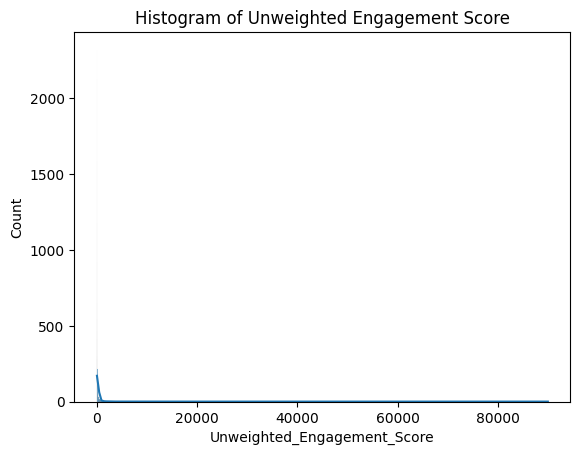

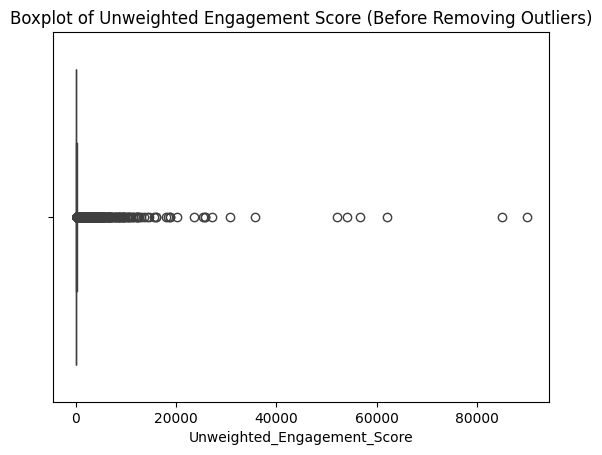

Outliers identified by z-score method: 91
Outliers identified by IQR method: 2032


/var/folders/7l/b916kv5120d_jxhh50x6gjxw0000gn/T/ipykernel_4288/2353276624.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filter_data['z_score'] = np.abs(stats.zscore(filter_data['Unweighted_Engagement_Score']))


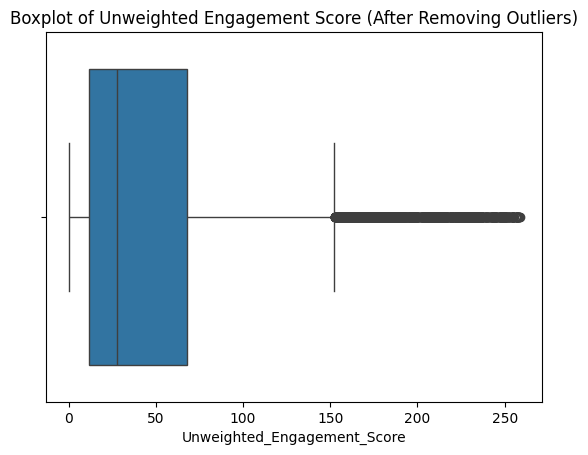

In [190]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# Assuming filter_data is your DataFrame
# Plotting the histogram of the dependent variable
sns.histplot(filter_data['Unweighted_Engagement_Score'], kde=True)
plt.title('Histogram of Unweighted Engagement Score')
plt.show()

# Plotting the boxplot of the dependent variable before removing outliers
sns.boxplot(x=filter_data['Unweighted_Engagement_Score'])
plt.title('Boxplot of Unweighted Engagement Score (Before Removing Outliers)')
plt.show()

# Calculating z-scores
filter_data['z_score'] = np.abs(stats.zscore(filter_data['Unweighted_Engagement_Score']))
outliers_z = filter_data[filter_data['z_score'] > 3]

# Identifying outliers using IQR with conventional quartiles
Q1 = filter_data['Unweighted_Engagement_Score'].quantile(0.25)
Q3 = filter_data['Unweighted_Engagement_Score'].quantile(0.75)
IQR = Q3 - Q1
outliers_iqr = filter_data[(filter_data['Unweighted_Engagement_Score'] < (Q1 - 1.5 * IQR)) | 
                           (filter_data['Unweighted_Engagement_Score'] > (Q3 + 1.5 * IQR))]

print("Outliers identified by z-score method:", outliers_z.shape[0])
print("Outliers identified by IQR method:", outliers_iqr.shape[0])

# Assuming you decide to remove outliers based on the IQR method
# Updating filter_data to exclude these outliers
filtered_data_no_extremes = filter_data[~filter_data.index.isin(outliers_iqr.index)]

# Plotting the boxplot of the dependent variable after removing outliers
sns.boxplot(x=filtered_data_no_extremes['Unweighted_Engagement_Score'])
plt.title('Boxplot of Unweighted Engagement Score (After Removing Outliers)')
plt.show()


In [193]:
filtered_data_no_extremes.groupby('Unweighted_Engagement_Score').size().head(20)

Unweighted_Engagement_Score
0.000000     54
1.000000    204
1.250000      1
1.333333      6
1.500000     16
1.666667     38
1.750000      4
2.000000    157
2.250000      5
2.333333     44
2.500000     35
2.666667     27
2.750000      9
3.000000    157
3.250000     10
3.333333     33
3.500000     48
3.666667     54
3.750000     15
4.000000    124
dtype: int64

In [177]:
from scipy.stats import shapiro, spearmanr

# Perform descriptive statistics for independent variables
descriptive_stats = filter_data[['text_length', 'hashtag_count', 'readability_score', 'emoji_count']].describe()

# Perform a normality test on 'Unweighted_Engagement_Score'
shapiro_test = shapiro(filter_data['Unweighted_Engagement_Score'].dropna())

# Perform correlation analysis between independent variables and 'Unweighted_Engagement_Score'
correlation_results = {}
for var in ['text_length', 'hashtag_count', 'readability_score', 'emoji_count']:
    correlation_test = spearmanr(filter_data[var], filter_data['Unweighted_Engagement_Score'])
    correlation_results[var] = correlation_test

descriptive_stats, shapiro_test, correlation_results


/var/folders/7l/b916kv5120d_jxhh50x6gjxw0000gn/T/ipykernel_4288/1720650332.py:7: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 15443.
  shapiro_test = shapiro(filter_data['Unweighted_Engagement_Score'].dropna())


(        text_length  hashtag_count  readability_score   emoji_count
 count  15443.000000   15443.000000       15443.000000  15443.000000
 mean     242.328887       1.339701          72.496277      1.435667
 std      211.976664       4.726477          44.523002      1.726937
 min        1.000000       0.000000       -1739.000000      0.000000
 25%      108.000000       0.000000          56.000000      0.000000
 50%      205.000000       0.000000          69.000000      1.000000
 75%      309.000000       1.000000          81.000000      2.000000
 max     4149.000000      37.000000         206.000000     21.000000,
 ShapiroResult(statistic=0.08634217071206485, pvalue=1.584635293954187e-125),
 {'text_length': SignificanceResult(statistic=-0.17669132055776599, pvalue=1.6274481284707162e-108),
  'hashtag_count': SignificanceResult(statistic=-0.017793918681774365, pvalue=0.027018946477364546),
  'readability_score': SignificanceResult(statistic=0.06347402073198419, pvalue=2.897769924669076e

In [178]:
from scipy.stats import shapiro
shapiro(filter_data['Unweighted_Engagement_Score'].dropna())


/var/folders/7l/b916kv5120d_jxhh50x6gjxw0000gn/T/ipykernel_4288/1189240361.py:2: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 15443.
  shapiro(filter_data['Unweighted_Engagement_Score'].dropna())


ShapiroResult(statistic=0.08634217071206485, pvalue=1.584635293954187e-125)

In [179]:
from scipy.stats import spearmanr
for var in ['text_length', 'hashtag_count', 'readability_score', 'emoji_count']:
    print(var, spearmanr(filter_data[var], filter_data['Unweighted_Engagement_Score']))


text_length SignificanceResult(statistic=-0.17669132055776599, pvalue=1.6274481284707162e-108)
hashtag_count SignificanceResult(statistic=-0.017793918681774365, pvalue=0.027018946477364546)
readability_score SignificanceResult(statistic=0.06347402073198419, pvalue=2.897769924669076e-15)
emoji_count SignificanceResult(statistic=-0.02374204473317492, pvalue=0.0031715961284457836)


In [194]:
import statsmodels.api as sm
X = filtered_data_no_extremes[['text_length', 'hashtag_count', 'readability_score', 'emoji_count']]
y = filtered_data_no_extremes['Unweighted_Engagement_Score']
X = sm.add_constant(X)  # Adds a constant term to the predictor
model = sm.OLS(y, X).fit()
print(model.summary())


                                 OLS Regression Results                                
Dep. Variable:     Unweighted_Engagement_Score   R-squared:                       0.030
Model:                                     OLS   Adj. R-squared:                  0.029
Method:                          Least Squares   F-statistic:                     102.6
Date:                         Wed, 20 Mar 2024   Prob (F-statistic):           3.15e-86
Time:                                 15:07:33   Log-Likelihood:                -72734.
No. Observations:                        13411   AIC:                         1.455e+05
Df Residuals:                            13406   BIC:                         1.455e+05
Df Model:                                    4                                         
Covariance Type:                     nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------

In [181]:
import statsmodels.api as sm
X = outliers_iqr[['text_length', 'hashtag_count', 'readability_score', 'emoji_count']]
y = outliers_iqr['Unweighted_Engagement_Score']
X = sm.add_constant(X)  # Adds a constant term to the predictor
model = sm.OLS(y, X).fit()
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:     Unweighted_Engagement_Score   R-squared:                       0.007
Model:                                     OLS   Adj. R-squared:                  0.005
Method:                          Least Squares   F-statistic:                     3.591
Date:                         Wed, 20 Mar 2024   Prob (F-statistic):            0.00634
Time:                                 14:56:43   Log-Likelihood:                -19935.
No. Observations:                         2032   AIC:                         3.988e+04
Df Residuals:                             2027   BIC:                         3.991e+04
Df Model:                                    4                                         
Covariance Type:                     nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------

In [182]:
# Initialize a dictionary to store descriptive statistics for each variable within each post type
descriptive_stats = {var: {} for var in independent_vars}

# Iterate over each variable and post type to calculate descriptive statistics
for var in independent_vars:
    for post_type in post_type_columns:
        # Filter data for the current post type
        filtered_data = filter_data[filter_data[post_type] == 1][var]
        
        # Calculate descriptive statistics and store them in a more readable format
        descriptive_stats[var][post_type] = {
            'Mean': filtered_data.mean(),
            'Median': filtered_data.median(),
            'Standard Deviation': filtered_data.std(),
            'Interquartile Range': filtered_data.quantile(0.75) - filtered_data.quantile(0.25),
            'Count': filtered_data.count()  # Adding count for more insight
        }

# Convert the descriptive statistics dictionary to a DataFrame for better readability
descriptive_stats_df = pd.DataFrame(descriptive_stats).transpose()
descriptive_stats_df = pd.concat({k: pd.DataFrame(v).transpose() for k, v in descriptive_stats.items()}, axis=0)
descriptive_stats_df.index.names = ['Variable', 'Post Type']
descriptive_stats_df



,,Mean,Median,Standard Deviation,Interquartile Range,Count
Variable,Post Type,,,,,
text_length,Unweighted_Engagement_Score,499.151961,520.0,322.887742,466.00,204.0
hashtag_count,Unweighted_Engagement_Score,11.088235,9.5,11.607797,20.25,204.0
readability_score,Unweighted_Engagement_Score,47.818627,36.5,52.530183,60.25,204.0
emoji_count,Unweighted_Engagement_Score,1.338235,1.0,1.840515,2.00,204.0


In [183]:
from scipy.stats import kruskal

# Example: Comparing engagement scores across three parts of the day
scores_morning = merged_df[merged_df['Part of Day Numeric'] == 0]['Unweighted_Engagement_Score'].dropna()
scores_afternoon = merged_df[merged_df['Part of Day Numeric'] == 1]['Unweighted_Engagement_Score'].dropna()
scores_evening = merged_df[merged_df['Part of Day Numeric'] == 2]['Unweighted_Engagement_Score'].dropna()
scores_nights = merged_df[merged_df['Part of Day Numeric'] == 3]['Unweighted_Engagement_Score'].dropna()

stat, p = kruskal(scores_morning, scores_afternoon, scores_evening)
print(f"Kruskal-Wallis H Test: Statistic={stat}, p-value={p}")

KeyError: 'Part of Day Numeric'